# Statistical Learning


## Prediction and Inference

### Prediction

- The accuracy of predictions depend on two quantities, reducible error and irreducible error
  - Reducible Error (Residual)
  - Irreducible Error (Noise)

![image.png](https://gisyaliny.github.io/gisc-6323/book/tranditional/img/01.png)


### Curse of Dimensionality

- [Reading Material](https://towardsdatascience.com/the-curse-of-dimensionality-5673118fe6d2)

![image.png](https://gisyaliny.github.io/gisc-6323/book/tranditional/img/02.png)

- As the dimensionality of data increases, the feature space becomes sparser, and the data is easier to separate. This is the curse of dimensionality in a nutshell.

#### Concept

1. **High-Dimensional Space**: In a high-dimensional space, the volume of the space increases exponentially, leading to data becoming sparse. This sparsity makes it **difficult for algorithms to find patterns without overfitting**.

2. **Distance Metrics Become Less Useful**: In high dimensions, traditional distance metrics like **Euclidean distance lose their meaning**, making it hard to differentiate between data points.

3. **Computational Complexity**: More dimensions require exponentially more computational resources for processing.

4. **Dimensional Paradoxes**: For instance, in a 10-dimensional unit hypercube, **the distance from the center to a corner is about $3.16$,** much larger than the expected 1.0 in lower dimensions.
   - Therefore, **it's very hard to find nearest neighbor in high-dimension that stays locally.**

#### Example

- K-Nearest Neighbors (KNN) in High-Dimensional Space
  - Objective: To show how the performance of KNN deteriorates with increasing dimensionality.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Function to generate synthetic data
def generate_data(dimensions, num_samples=1000):
    X = np.random.rand(num_samples, dimensions)
    # For each data point, this checks if the sum of its features is greater than half of the number of dimensions of the data. If it is, the condition is True; otherwise, it's False.
    y = (np.sum(X, axis=1) > dimensions / 2).astype(int) 
    return X, y

# Example: Generate data for 2 dimensions
X, y = generate_data(2)

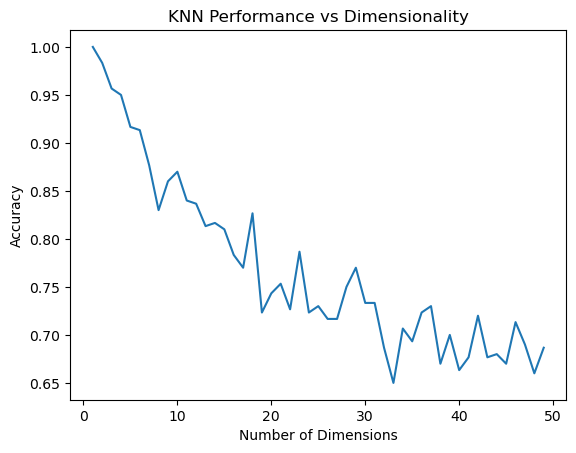

In [3]:
# Function to evaluate KNN
def evaluate_knn(dimensions):
    X, y = generate_data(dimensions)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Plotting performance
dims = range(1, 50)  # Evaluate from 1 to 50 dimensions
acc_scores = [evaluate_knn(dim) for dim in dims]

plt.plot(dims, acc_scores)
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs Dimensionality')
plt.show()

### Inference

- Understand the exact form of f(x)


### How to estimate $f$

#### Parametric Methods

- Steps:
  - Assuming a specific form for the function $f$
    - For example, assuming $f$ is linear, or follows a specific distribution in logistic regression.
  - Train the model

* **Disadvantage**: If the assumed form of $f$ does not align well with its true, unknown form, the model may perform poorly.

#### Non-Parametric Methods

- **Definition**: Non-parametric methods do not assume a specific form for $f$. They attempt to learn $f$ directly from the data.
  - Example: Decision trees and Kernel density estimators.
- **Disadvantage**:
  - These methods typically require a **larger number of observations** to achieve accurate modeling
  - They can also suffer from the **curse of dimensionality**, where performance degrades as the number of features increases.


#### Trade-off between Prediction Accuracy and Model Interpretability

- If we are mainly interested in **inference**, then restrictive models are much more **interpretable**. For instance, when inference is the goal, the linear model may be a good choice

![image.png](https://gisyaliny.github.io/gisc-6323/book/tranditional/img/03.png)


### Supervised Versus Unsupervised Learning

#### Supervised Learning

- Analysis the relationship between independent variables (x_1,x_2,…)and response (y)
  1. Regression
     - Problems with a quantitative response as regression problems
     - **Example**: Predicting house prices based on features like size and location.
  2. Classification
     - Problems with a qualitative response as classification problems
     - **Example**: Determining if an email is spam or not.

#### Unsupervised Learning

- Understand the relationships between the variables or between the observations
  1. Cluster analysis
     - Identifying groups in data based on similarities.
     - **Example**: Market segmentation in business.


### Assessing Model Accuracy

### Regression

1. Mean Squared Error (`MSE`)
   - $MSE =  E(y-f(x))^2 = E(y-\hat y)^2$

#### Classification

1. Instead of using `MSE`, the most common approach for quantifying the accuracy is `Error Rate`
   - $ \frac{1}{n}\sum\_{i=1}^{n}I(y_i \neq \hat y_i) $


### The Bias-Variance Trade-Off

1. What is bias? (Accuracy)
   - Bias is the difference between the **average(expectation) prediction** of our model and the **ground truth**.
   - $E(\hat y-y)$
2. What is Variance? (Precision)
   - Variance is the variability of model prediction.
   - More **flexible** statistical methods have **higher variance**
   - $Var(\hat y - y)$
3. Their relation
   - Suppose we have the variable  
      $y = f(x) + e$
   - Where e is the error term and it’s normally distributed with a mean of 0, and we have  
      $e = y-f(x) = E(y-\hat y)$
   - Since we want to **eliminate the effects of direction** of errors (positive or negative), we use expected squared error to measure the fitness of model, which equals to  
      $E(e^2) = E((y-\hat y)^2)$
   - Since $Var(X) = E(X^2) - E(X)^2$, we will have  
      $E(e^2) = Var(e) + E(e)^2 = Var(y-\hat y) + E(y-\hat y)^2$
   - $Var(y-\hat y)$ is the variance, $E(y-\hat y)$ is bias

![image.png](https://gisyaliny.github.io/gisc-6323/book/tranditional/img/04.png)
